In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import datasets

In [224]:
val_loss_logs = []
val_index_logs = []

test_loss_logs = []
test_index_logs = []

loss_logs = []
lr_logs = []

In [225]:
# for file in ['/home/cse/btech/cs1200448/MatLlama/scripts/logs/warmup-try_24_03_14_02_30.txt']:
# for file in ['/home/cse/btech/cs1200448/MatLlama/scripts/logs/casualhyperparam_24_03_16_04_59.txt']:
for file in ['/home/cse/btech/cs1200448/MatLlama/scripts/logs/lr-change2_24_03_17_18_11.txt', '/home/cse/btech/cs1200448/MatLlama/scripts/logs/lr-change2_24_03_17_22_28.txt']:
# for file in ['/home/cse/btech/cs1200448/MatLlama/scripts/logs/lr-change_24_03_17_12_44.txt', '/home/cse/btech/cs1200448/MatLlama/scripts/logs/lr-change_24_03_17_15_53.txt']:
# for file in ['/home/cse/btech/cs1200448/MatLlama/scripts/logs/esr-same-warmup-slope_24_03_19_01_32.txt', '/home/cse/btech/cs1200448/MatLlama/scripts/logs/esr-same-warmup-slope_24_03_19_04_42.txt', '/home/cse/btech/cs1200448/MatLlama/scripts/logs/esr-same-warmup-slope_24_03_19_19_08.txt']:
# for file in ['/home/cse/btech/cs1200448/MatLlama/scripts/logs/esr-but-low-lr_24_03_18_02_37.txt', '/home/cse/btech/cs1200448/MatLlama/scripts/logs/esr-but-low-lr_24_03_18_04_19.txt']:
# for file in ['/home/cse/btech/cs1200448/MatLlama/scripts/logs/esr-normal-lr_24_03_19_04_51.txt', '/home/cse/btech/cs1200448/MatLlama/scripts/logs/esr-normal-lr_24_03_19_10_55.txt']:
    with open(f'{file}', 'r') as f:
        raw_logs = f.readlines()
    
    val_logs = [i for i in raw_logs if 'validation loss' in i and 'end of' not in i]
    test_logs = [i for i in raw_logs if 'test loss' in i]
    logs = [i for i in raw_logs if 'consumed samples:' in i]
    lr = r"learning rate:\s*([+-]?[0-9]*[\.][0-9]*E[+-][0-9]+)"
    train_loss = r"lm loss:\s*([+-]?[0-9]*[\.][0-9]*E[+-][0-9]+)"
    val_test_loss = r"lm loss value:\s*([+-]?[0-9]*[\.][0-9]*E[+-][0-9]+)"
    val_index = r"validation loss at iteration\s*([0-9]*)"
    test_index = r"test loss at iteration\s*([0-9]*)"
    
    val_loss_logs += [float(re.search(val_test_loss, text).group(1)) for text in val_logs]
    val_index_logs += [float(re.search(val_index, text).group(1)) for text in val_logs]
    
    test_loss_logs += [float(re.search(val_test_loss, text).group(1)) for text in test_logs]
    test_index_logs += [float(re.search(test_index, text).group(1)) for text in test_logs]
    
    loss_logs += [float(re.search(train_loss, text).group(1)) for text in logs]
    lr_logs += [float(re.search(lr, text).group(1)) for text in logs]

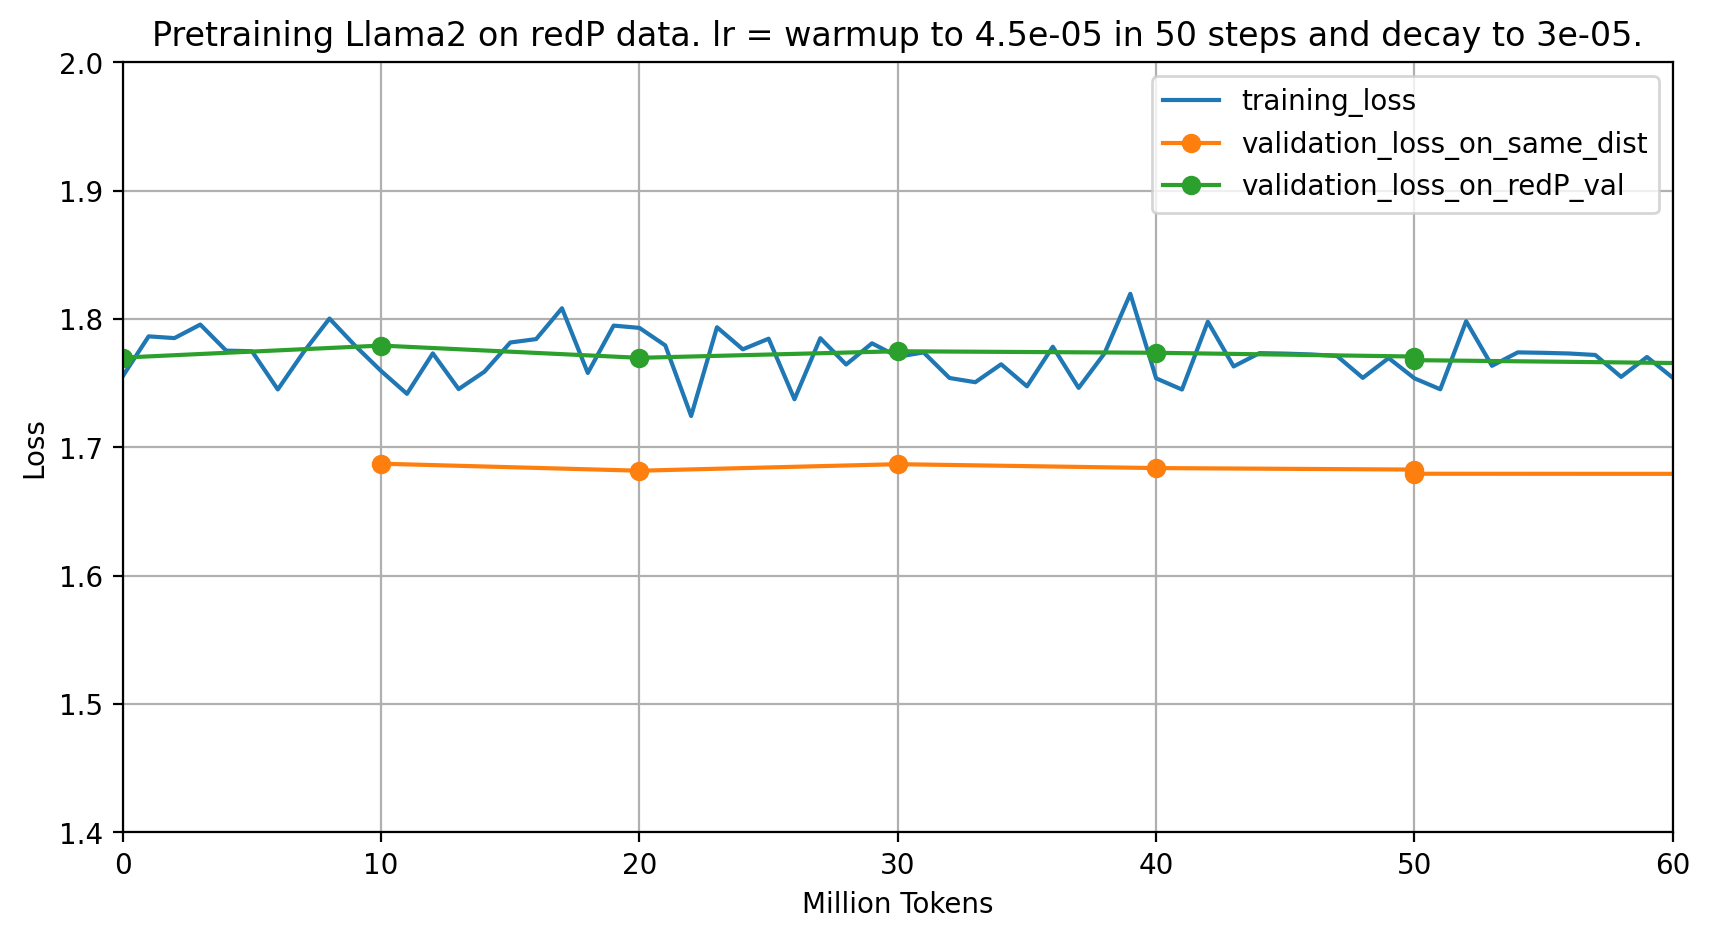

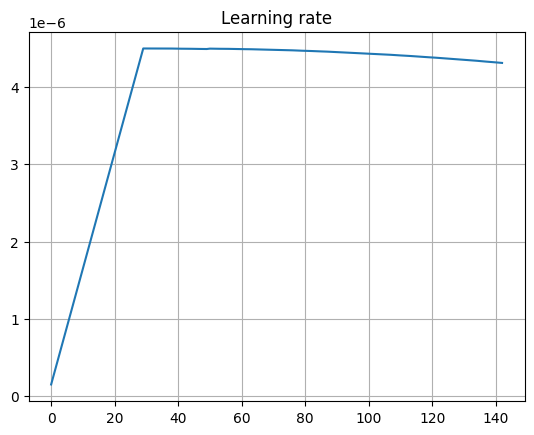

In [226]:
fig = plt.figure(figsize=(10,5),dpi=200)
plt.plot(loss_logs, label = 'training_loss')
plt.plot(val_index_logs, val_loss_logs, marker = 'o', label = 'validation_loss_on_same_dist')
plt.plot([0] + test_index_logs, [1.77] + test_loss_logs, marker = 'o', label = 'validation_loss_on_redP_val')
plt.ylabel('Loss')
plt.xlabel('Million Tokens')
plt.ylim([1.4,2])
plt.xlim([0,60])
plt.legend()
plt.title(f"Pretraining Llama2 on redP data. lr = warmup to {4.5e-5} in {50} steps and decay to {3e-5}.")
# plt.title(f"Pretraining Llama2 on e+s+r data. lr = warmup to {3e-4} in {50} steps and decay to {3e-5}")
plt.grid()
plt.show()
plt.title("Learning rate")
plt.plot(lr_logs)
plt.grid()
plt.show()

In [122]:
import json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
csvs = '/home/cse/btech/cs1200448/MatLlama/scripts/csvs'
dict_scores = {}

In [123]:
for file in [i for i in os.listdir(csvs) if i.startswith('casualhyperparam') or i.startswith('llama')]:
    try:
        df = pd.read_csv(os.path.join(csvs, file), header = [0,1], index_col = 0)
        df = df.replace('-', None).astype(float)
        dict_scores[file[:-19]] = df.to_dict()
    except Exception as e:
        print(file)
        print(e)

In [124]:
items = list(dict_scores.items())
items.sort(key = lambda x : int(x[0].split('_')[-1]) if not x[0].startswith('llama') else -1)
# items.sort(key = lambda x : x[0])
ckpt_keys = [i[0] for i in items]
ckpts = [dict_scores[i] for i in ckpt_keys]
ckpt_keys = ckpt_keys
tasks = [(i[0], i[1].replace('_mean', '').replace('_std', '')) for i in list(ckpts[0].keys())]
tasks = list(set(tasks))
tasks = [i for i in list(ckpts[0].keys())]
tasks, ckpt_keys

([('ee', 'sc_comics_mean'),
  ('ee', 'sc_comics_std'),
  ('pc', 'glass_non_glass_mean'),
  ('pc', 'glass_non_glass_std'),
  ('qna', 'squadv2_mean'),
  ('qna', 'squadv2_std'),
  ('re', 'sc_comics_mean'),
  ('re', 'sc_comics_std'),
  ('re', 'structured_re_mean'),
  ('re', 'structured_re_std'),
  ('sar', 'synthesis_actions_mean'),
  ('sar', 'synthesis_actions_std'),
  ('sc', 'sofc_sent_mean'),
  ('sc', 'sofc_sent_std')],
 ['llama-7b',
  'casualhyperparam_1',
  'casualhyperparam_2',
  'casualhyperparam_3',
  'casualhyperparam_4',
  'casualhyperparam_5',
  'casualhyperparam_6',
  'casualhyperparam_7',
  'casualhyperparam_8',
  'casualhyperparam_9',
  'casualhyperparam_10',
  'casualhyperparam_75'])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

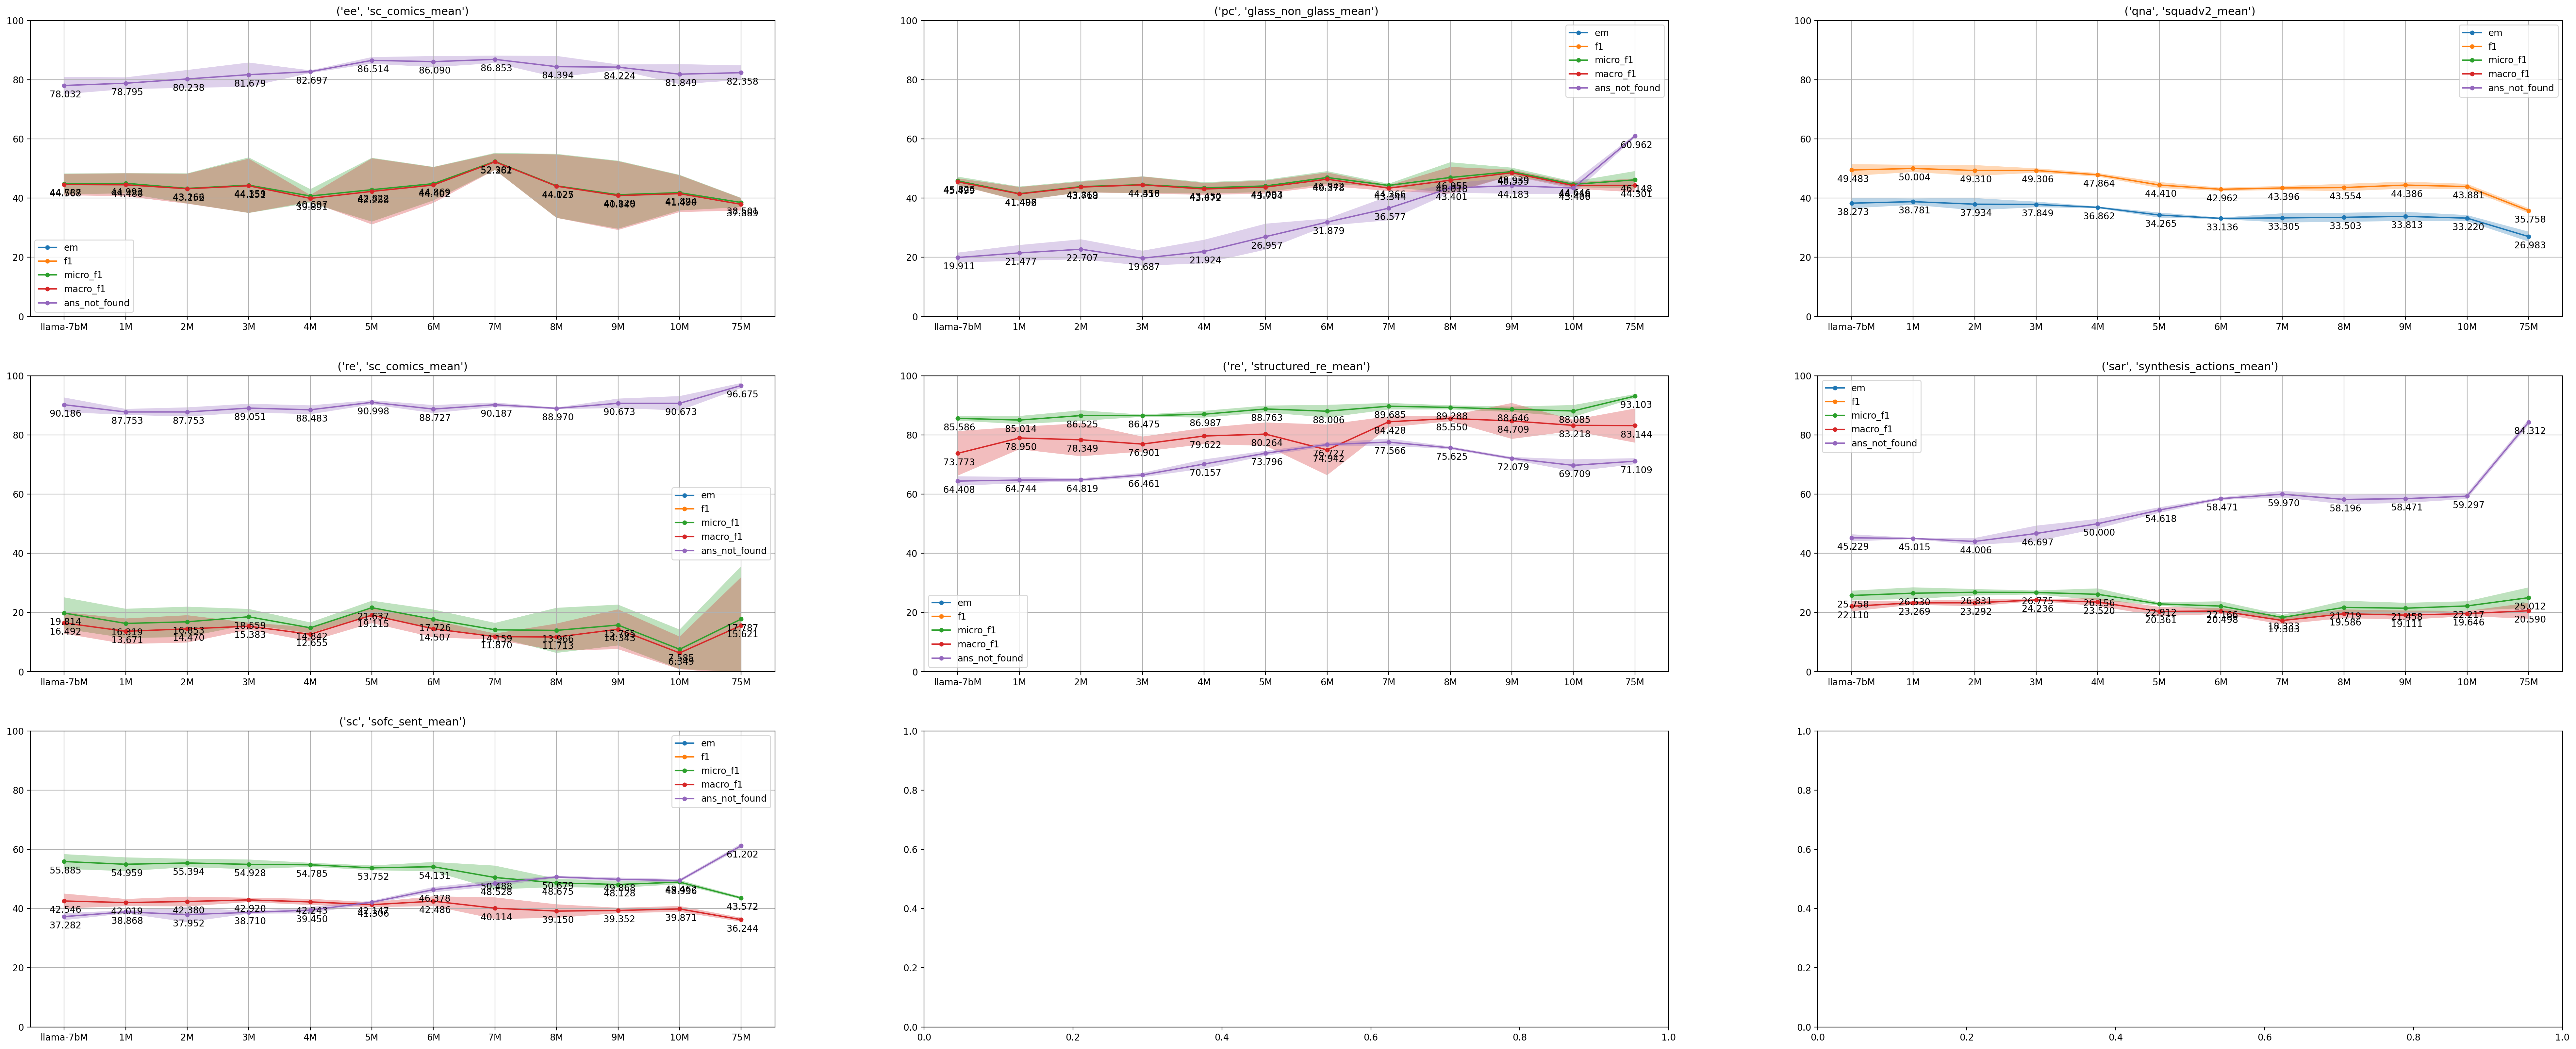

In [125]:
plt.rcParams.update({'font.size': 10})
subset = tuple(i for i in range(len(ckpts)))
fig, ax = plt.subplots(3,3,figsize = (50,20), dpi = 200)
idx = 0
for task in tasks:
    if task[1].endswith('std'):
        continue
    metrics = list([(i,'mean') for i in ckpts[0][task].keys()]) + ['model'] + list([(i,'std') for i in ckpts[0][task].keys()])
    vdict = {i : [] for i in metrics}
    for _,ckpt in enumerate(subset):
        curr_model = ckpt_keys[ckpt]
        curr_ckpt = ckpts[ckpt]
        vdict['model'].append(curr_model)
        for mtr in vdict:
            if mtr == 'model':
                continue
            if mtr[1] == 'mean':
                vdict[mtr].append(curr_ckpt[task][mtr[0]])
            else:
                vdict[mtr].append(curr_ckpt[(task[0], task[1].replace('mean', 'std'))][mtr[0]])

    for mtr,values in vdict.items():
        if mtr == 'model' or mtr[1] == 'std':
            continue
        ax[idx//3,idx%3].plot(range(len(values)), values, markersize = 4, marker = 'o', label = mtr[0])
        std_values = vdict[(mtr[0],'std')]
        ax[idx//3,idx%3].fill_between(range(len(values)), np.array(values)-np.array(std_values), np.array(values)+np.array(std_values), alpha=0.3)
        for i in range(len(values)):
            ax[idx//3,idx%3].text(i, values[i] - 4, f'{values[i] : .3f}', ha='center')
    ax[idx//3,idx%3].set_title(task)
    ax[idx//3,idx%3].set_ylim(0,100)
    ax[idx//3,idx%3].set_xticks(range(len(vdict['model'])))
    ax[idx//3,idx%3].set_xticklabels([i .split('_')[-1]+ 'M' for i in vdict['model']])
    ax[idx//3,idx%3].legend(loc = 'best')
    ax[idx//3,idx%3].grid()
            
    idx += 1
plt.savefig(ckpt_keys[-1]+'.png')

In [48]:
# subset = tuple(i for i in range(len(ckpts)))
# for task in tasks:
#     if task[1].endswith('std'):
#         continue
#     fig = plt.figure(figsize = (30,10), dpi = 200)
#     plt.ylim([0,100])
#     metrics = list([(i,'mean') for i in ckpts[0][task].keys()]) + ['model'] + list([(i,'std') for i in ckpts[0][task].keys()])
#     vdict = {i : [] for i in metrics}
#     for _,ckpt in enumerate(subset):
#         curr_model = ckpt_keys[ckpt]
#         curr_ckpt = ckpts[ckpt]
#         vdict['model'].append(curr_model)
#         for mtr in vdict:
#             if mtr == 'model':
#                 continue
#             if mtr[1] == 'mean':
#                 vdict[mtr].append(curr_ckpt[task][mtr[0]])
#             else:
#                 vdict[mtr].append(curr_ckpt[(task[0], task[1].replace('mean', 'std'))][mtr[0]])

#     for mtr,values in vdict.items():
#         if mtr == 'model' or mtr[1] == 'std':
#             continue
#         plt.plot(range(len(values)), values, markersize = 4, marker = 'o', label = mtr[0])
#         std_values = vdict[(mtr[0],'std')]
#         plt.fill_between(range(len(values)), np.array(values)-np.array(std_values), np.array(values)+np.array(std_values), alpha=0.3, label='std bound for ' + mtr[0])
#         for i in range(len(values)):
#             plt.text(i, values[i] - 4, f'{values[i] : .3f}', ha='center')
#     plt.title(task)
#     plt.xticks(range(len(vdict['model'])), [i + 'M' for i in vdict['model']])
#     plt.legend(loc = 'best')
#     plt.grid()
#     plt.show()

# Making the redP data random

In [67]:
import json
import datasets
import numpy as np
redP_train = [json.loads(line) for line in open('/scratch/cse/btech/cs1200448/MatLlama/redP_split/train.json', 'r')]
# redP_train = json.load(open('/scratch/cse/btech/cs1200448/MatLlama/redP_split/train.json', 'r'))
# redP_train = datasets.load_dataset('json', '/scratch/cse/btech/cs1200448/MatLlama/redP_split/train.json')

In [71]:
for i in range(len(redP_train)):
    redP_train[i]['id'] = i

In [157]:
# import json
# from datasets import load_dataset
# with open("/scratch/cse/btech/cs1200448/MatLlama/redP_split/train_random.json", "w") as f:
#     for document in redP_train:
#         document = {"id": document["id"], "text": document["text"]}
#         f.write(json.dumps(document) + "\n")